# Pandas 10분 완성

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 목차

0. 실전 지식들
1. Object Creation (객체 생성)
2. Viewing Data (데이터 확인하기)
3. Selection (선택)
4. Missing Data (결측치)
5. Operation (연산)
6. Merge (병합)
7. Grouping (그룹화)
8. Reshaping (변형)
9. Time Series (시계열)
10. Categoricals (범주화)
11. Plotting (그래프)
12. Getting Data In / Out (데이터 입 / 출력)
13. Gotchas (잡았다!)

## 0. 실전 지식들

In [123]:
# 칼럼 이름 변경

df = pd.DataFrame({ 'A': [1, 2, 3], 'B': 3, 'C': [0, 1, 5] })
print(df)

df.rename(index=str, columns={'A': 'a', 'B': 'b'})

# datetime string을 date string으로 변환할 때 주의할 점
## df는 Event Time이 datetime 형식의 string으로 저장 되어있었는데 (e.g 2019-04-21 19:00:00), 그것을 date형식의 string (e.g 2019-04-21)으로 바꿔주어야 했음

df = pd.read_csv('./data/android_purchase_20190401-20190430.csv')
# Event Revenue USD
df_fb = df[df["Media Source"] == "Facebook Ads"]
df_fb['date'] = pd.to_datetime(df_fb["Event Time"]).dt.date.apply(str) #### 이 부분에서 str으로 캐스팅 해주지 않으면 나중에 merge가 통하지않음!!! 데이터 타입이 다르기때문

df1 = df_fb.groupby("date").sum().reset_index()[["date", "Event Revenue USD"]]

df2 = pd.read_csv('./data/android_purchase_20190401-20190430_db.csv')
df2 = df2.rename(index=str, columns={"event_date": "date", "sum(usd_revenue)": "db revenue"})

merged_df = pd.merge(left=df1, right=df2, on="date")
merged_df["diff"] = merged_df["Event Revenue USD"] - merged_df["db revenue"]
merged_df["Event Revenue USD"].sum()

   A  B  C
0  1  3  0
1  2  3  1
2  3  3  5


,a,b,C
0,1,3,0
1,2,3,1
2,3,3,5


## 1. Object Creation

In [104]:
# 객체 생성
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

dates = pd.date_range('20130101', periods=6)
print(dates)

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(np.random.randn(6,4))
print(list('ABCD'))
print(df)

df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(5)), dtype='float32'),
    'D': np.array([3] * 5, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train", "*?"]),
    'F': 'foo'
})
print(df2)
print(df2.dtypes)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
[[ 0.03257721  0.04322937  2.06084281 -0.7285399 ]
 [-1.71403398 -1.45027133  1.1004807  -0.19773215]
 [ 0.76699821  1.81085232 -0.82646086 -0.95270816]
 [ 2.46285084 -1.26403847  1.43778728  1.04610377]
 [ 1.92716228 -0.24446098 -1.32787992  0.54884135]
 [-0.54438332  1.26949814 -0.08198781 -0.39043143]]
['A', 'B', 'C', 'D']
                   A         B         C         D
2013-01-01 -0.965295  1.192757  0.748605  0.759845
2013-01-02 -0.142434 -0.224189 -1.319054  0.327877
2013-01-03  0.462559  0.732516 -0.010329 -1.312773
2013-01-04  2.349013  0.480894  0.118525 -1.597862
2013-01-05  0.031699 -0.155261  0.696563 -0.703245
2013-01-06  0.703306 -0.971034 -0.227249  0.731490
     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 

## 2. Viewing Data

In [105]:
# 데이터 확인
df.tail(3) # 끝에서 마지막 3줄
df.tail() # 끝에서 마지막 5줄

print(df.head())
print(df.tail(3))

print(df.index)
print(df.columns)
print(df.values)
print(df.describe())

print(df.T)
print(df.sort_index(axis=1, ascending=False)) # axis=0 은 y축 axis=1은 x축
print(df.sort_values(by='B'))

                   A         B         C         D
2013-01-01 -0.965295  1.192757  0.748605  0.759845
2013-01-02 -0.142434 -0.224189 -1.319054  0.327877
2013-01-03  0.462559  0.732516 -0.010329 -1.312773
2013-01-04  2.349013  0.480894  0.118525 -1.597862
2013-01-05  0.031699 -0.155261  0.696563 -0.703245
                   A         B         C         D
2013-01-04  2.349013  0.480894  0.118525 -1.597862
2013-01-05  0.031699 -0.155261  0.696563 -0.703245
2013-01-06  0.703306 -0.971034 -0.227249  0.731490
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[-0.96529531  1.19275699  0.74860505  0.75984492]
 [-0.14243429 -0.22418923 -1.31905447  0.32787684]
 [ 0.46255908  0.73251618 -0.01032927 -1.31277303]
 [ 2.3490128   0.4808944   0.11852497 -1.59786231]
 [ 0.03169866 -0.15526124  0.69656302 -0.70324548]
 [ 0.70330589 -0.97103393 -0

## 3. Selection

In [106]:
# selection
print(df['A'])
print(df[0:3])
print(df['20130102':'20130104'])

2013-01-01   -0.965295
2013-01-02   -0.142434
2013-01-03    0.462559
2013-01-04    2.349013
2013-01-05    0.031699
2013-01-06    0.703306
Freq: D, Name: A, dtype: float64
                   A         B         C         D
2013-01-01 -0.965295  1.192757  0.748605  0.759845
2013-01-02 -0.142434 -0.224189 -1.319054  0.327877
2013-01-03  0.462559  0.732516 -0.010329 -1.312773
                   A         B         C         D
2013-01-02 -0.142434 -0.224189 -1.319054  0.327877
2013-01-03  0.462559  0.732516 -0.010329 -1.312773
2013-01-04  2.349013  0.480894  0.118525 -1.597862


In [107]:
# selection by Label
print(df.loc[dates[0]])
print(df.loc[:, ['A','B']])
print(df.loc['20130102':'20130104', ['A', 'B']])
print(df.loc['20130102', ['A','B']])
print(df.loc[dates[0],'A'])
print(df.at[dates[0],'A'])

A   -0.965295
B    1.192757
C    0.748605
D    0.759845
Name: 2013-01-01 00:00:00, dtype: float64
                   A         B
2013-01-01 -0.965295  1.192757
2013-01-02 -0.142434 -0.224189
2013-01-03  0.462559  0.732516
2013-01-04  2.349013  0.480894
2013-01-05  0.031699 -0.155261
2013-01-06  0.703306 -0.971034
                   A         B
2013-01-02 -0.142434 -0.224189
2013-01-03  0.462559  0.732516
2013-01-04  2.349013  0.480894
A   -0.142434
B   -0.224189
Name: 2013-01-02 00:00:00, dtype: float64
-0.9652953059626976
-0.9652953059626976


In [108]:
# selection by position
print(df.iloc[3])
print(df.iloc[3:5, 0:2])
print(df.iloc[[1,2,4], [0,2]])
print(df.iloc[1:3,:])
print(df.iloc[:,1:3])
print(df.iloc[1,1])
print(df.iat[1,1])

A    2.349013
B    0.480894
C    0.118525
D   -1.597862
Name: 2013-01-04 00:00:00, dtype: float64
                   A         B
2013-01-04  2.349013  0.480894
2013-01-05  0.031699 -0.155261
                   A         C
2013-01-02 -0.142434 -1.319054
2013-01-03  0.462559 -0.010329
2013-01-05  0.031699  0.696563
                   A         B         C         D
2013-01-02 -0.142434 -0.224189 -1.319054  0.327877
2013-01-03  0.462559  0.732516 -0.010329 -1.312773
                   B         C
2013-01-01  1.192757  0.748605
2013-01-02 -0.224189 -1.319054
2013-01-03  0.732516 -0.010329
2013-01-04  0.480894  0.118525
2013-01-05 -0.155261  0.696563
2013-01-06 -0.971034 -0.227249
-0.22418922631058233
-0.22418922631058233


In [109]:
# Boolean indexing
print(df[df.A > 0]) #filter row
print(df[df > 0]) #Boolean 조건을 충족하는 데이터프레임에서 값을 선택

df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
print(df2)
print(df2['E'].isin(['two','four']))
print(df2[df2['E'].isin(['two','four'])])

                   A         B         C         D
2013-01-03  0.462559  0.732516 -0.010329 -1.312773
2013-01-04  2.349013  0.480894  0.118525 -1.597862
2013-01-05  0.031699 -0.155261  0.696563 -0.703245
2013-01-06  0.703306 -0.971034 -0.227249  0.731490
                   A         B         C         D
2013-01-01       NaN  1.192757  0.748605  0.759845
2013-01-02       NaN       NaN       NaN  0.327877
2013-01-03  0.462559  0.732516       NaN       NaN
2013-01-04  2.349013  0.480894  0.118525       NaN
2013-01-05  0.031699       NaN  0.696563       NaN
2013-01-06  0.703306       NaN       NaN  0.731490
                   A         B         C         D      E
2013-01-01 -0.965295  1.192757  0.748605  0.759845    one
2013-01-02 -0.142434 -0.224189 -1.319054  0.327877    one
2013-01-03  0.462559  0.732516 -0.010329 -1.312773    two
2013-01-04  2.349013  0.480894  0.118525 -1.597862  three
2013-01-05  0.031699 -0.155261  0.696563 -0.703245   four
2013-01-06  0.703306 -0.971034 -0.227249

In [110]:
# Setting
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
print(s1)
df['F'] = s1

# set by label
df.at[dates[0], 'A'] = 0
# set by position
df.iat[0,1] = 0
# using Numpy array
df.loc[:, 'D'] = np.array([5] * len(df))
print(df)

df2 = df.copy()
df2[df2 > 0] = -df2
print(df2)

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64
                   A         B         C  D    F
2013-01-01  0.000000  0.000000  0.748605  5  NaN
2013-01-02 -0.142434 -0.224189 -1.319054  5  1.0
2013-01-03  0.462559  0.732516 -0.010329  5  2.0
2013-01-04  2.349013  0.480894  0.118525  5  3.0
2013-01-05  0.031699 -0.155261  0.696563  5  4.0
2013-01-06  0.703306 -0.971034 -0.227249  5  5.0
                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.748605 -5  NaN
2013-01-02 -0.142434 -0.224189 -1.319054 -5 -1.0
2013-01-03 -0.462559 -0.732516 -0.010329 -5 -2.0
2013-01-04 -2.349013 -0.480894 -0.118525 -5 -3.0
2013-01-05 -0.031699 -0.155261 -0.696563 -5 -4.0
2013-01-06 -0.703306 -0.971034 -0.227249 -5 -5.0


## 4. Missing Data

In [111]:
# 4. Missing Data
# Pandas는 기본적으로 np.nan값을 결측치로 포함
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
print(df1)

# delete rows which includes one or more than one nans
print(df1.dropna(how='any'))

# replace nan
print(df1.fillna(value=5))

# replace all nan as True and others as False
print(pd.isna(df1))

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.748605  5  NaN  1.0
2013-01-02 -0.142434 -0.224189 -1.319054  5  1.0  1.0
2013-01-03  0.462559  0.732516 -0.010329  5  2.0  NaN
2013-01-04  2.349013  0.480894  0.118525  5  3.0  NaN
                   A         B         C  D    F    E
2013-01-02 -0.142434 -0.224189 -1.319054  5  1.0  1.0
                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.748605  5  5.0  1.0
2013-01-02 -0.142434 -0.224189 -1.319054  5  1.0  1.0
2013-01-03  0.462559  0.732516 -0.010329  5  2.0  5.0
2013-01-04  2.349013  0.480894  0.118525  5  3.0  5.0
                A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True


## 5. Operation(연산)

In [112]:
# stats are executed after excluding the nan
# descriptive statistics
print(df.mean())

# different axis
print(df.mean(1))

s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

print(df)
# subtraction
print(df.sub(s, axis='index'))

# apply to each column values
print(df.apply(np.cumsum))
print(df.apply(lambda x: np.array([x.max() - x.min(), x.max(), x.min()])))

# histogramming
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
print(s.value_counts())
print(s.value_counts().sort_index())

# string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
print(s.str.lower())

A    0.567357
B   -0.022846
C    0.001177
D    5.000000
F    3.000000
dtype: float64
2013-01-01    1.437151
2013-01-02    0.862864
2013-01-03    1.636949
2013-01-04    2.189686
2013-01-05    1.914600
2013-01-06    1.901005
Freq: D, dtype: float64
                   A         B         C  D    F
2013-01-01  0.000000  0.000000  0.748605  5  NaN
2013-01-02 -0.142434 -0.224189 -1.319054  5  1.0
2013-01-03  0.462559  0.732516 -0.010329  5  2.0
2013-01-04  2.349013  0.480894  0.118525  5  3.0
2013-01-05  0.031699 -0.155261  0.696563  5  4.0
2013-01-06  0.703306 -0.971034 -0.227249  5  5.0
                   A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03 -0.537441 -0.267484 -1.010329  4.0  1.0
2013-01-04 -0.650987 -2.519106 -2.881475  2.0  0.0
2013-01-05 -4.968301 -5.155261 -4.303437  0.0 -1.0
2013-01-06       NaN       NaN       NaN  NaN  NaN
                   A         B         C   D     F
20

## 6. Merge (병합)

In [113]:
# Concat

df = pd.DataFrame(np.random.randn(10, 4))
print(df)
pieces = [df[:3], df[3:7], df[7:]]
print(pieces)
print(pd.concat(pieces))

# Join
# similar to SQL type

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

print(pd.merge(left, right, on='key'))

left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

print(pd.merge(left, right, on='key'))

# Append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
print(df)

s = df.iloc[3]
print(df.append(s, ignore_index=True))

          0         1         2         3
0 -0.428794  1.243135  0.315012  0.178301
1  1.663661  0.430596 -1.295938  0.241885
2  0.128997 -0.091805  0.296943 -0.003171
3 -0.300722 -0.866971  1.174087 -1.014083
4 -2.144853 -1.379196  0.269794 -0.651207
5  0.903889 -1.314081  2.189148  0.638780
6  1.393760 -0.452434  0.033229  0.598290
7  0.396327 -0.092730 -1.458243  0.046352
8  0.144884  0.481764 -0.031697  1.073935
9 -0.687442  0.508487 -0.118890 -0.321329
[          0         1         2         3
0 -0.428794  1.243135  0.315012  0.178301
1  1.663661  0.430596 -1.295938  0.241885
2  0.128997 -0.091805  0.296943 -0.003171,           0         1         2         3
3 -0.300722 -0.866971  1.174087 -1.014083
4 -2.144853 -1.379196  0.269794 -0.651207
5  0.903889 -1.314081  2.189148  0.638780
6  1.393760 -0.452434  0.033229  0.598290,           0         1         2         3
7  0.396327 -0.092730 -1.458243  0.046352
8  0.144884  0.481764 -0.031697  1.073935
9 -0.687442  0.508487 -0.118890

## 7. Grouping

- splitting
    - 몇몇 기준에 따라 여러 그룹으로 데이터를 분할(splitting)
- applying
    - 각 그룹에 독립적으로 함수를 적용 (applying)
- combining
    - 결과물들을 하나의 데이터 구조로 결합 (combining)

In [114]:
df = pd.DataFrame(
    {
        'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8)
    }
)
print(df)
print(df.groupby('A').sum())
print(df.groupby(['A', 'B']).sum())

     A      B         C         D
0  foo    one  1.281163 -1.838087
1  bar    one -1.068928  0.563073
2  foo    two  1.076280 -1.086930
3  bar  three  0.591464  0.912228
4  foo    two  0.190508  0.163959
5  bar    two -0.332771 -0.053303
6  foo    one -1.229038 -0.450492
7  foo  three  1.073221 -0.076818
            C         D
A                      
bar -0.810235  1.421998
foo  2.392134 -3.288368
                  C         D
A   B                        
bar one   -1.068928  0.563073
    three  0.591464  0.912228
    two   -0.332771 -0.053303
foo one    0.052126 -2.288579
    three  1.073221 -0.076818
    two    1.266788 -0.922971


## 8. Reshaping (변형)

In [115]:
# Stack
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                    'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                   'one', 'two', 'one', 'two']]))

print(tuples)

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print(index)
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
print(df)
df2 = df[:4]
print(df2)

stacked = df2.stack()
print(stacked)
print(stacked["bar"]["one"]["A"])

print(stacked.unstack())
print(stacked.unstack().unstack())
print(stacked.unstack().unstack()["A"]["two"])

print(stacked.unstack(1))

# pivot table
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                  'B': ['A', 'B', 'C'] * 4,
                  'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                  'D': np.random.randn(12),
                  'E': np.random.randn(12)})

print(df)
print(pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C']))

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])
                     A         B
first second                    
bar   one     0.572474  1.903960
      two    -0.341994 -0.228169
baz   one     0.205560  1.192985
      two     0.620073  1.211654
foo   one     1.160339 -0.134443
      two     0.568155  0.099052
qux   one    -1.248111 -1.801250
      two     1.212224  1.226507
                     A         B
first second                    
bar   one     0.572474  1.903960
      two    -0.341994 -0.228169
baz   one     0.205560  1.192985
      two     0.620073  1.211654
first  second   
bar    one     A    0.572474
               B    1.903960
       two     A   -0.341994
               B   -0.228169
baz    one     A    0.205560
     

## 9. Time Series

In [116]:
rng = pd.date_range('1/1/2012', periods=100, freq='s') # min, h, M
print(rng)
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
print(ts)
print(ts.resample('5Min').sum())

rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
print(rng)
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts)

ts_utc = ts.tz_localize('UTC')
print(ts_utc)

print(ts.tz_localize('Asia/Seoul'))

rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)

ps = ts.to_period()
print(ps)
print(ps.to_timestamp())
print(ps.to_timestamp()['2012-01-01'])

prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
print(ts)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
print(ts.head())

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

## 10. Categoricals

In [117]:
df = pd.DataFrame({"id": [1,2,3,4,5,6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

df["grade"] = df["raw_grade"].astype("category")
print(df["grade"])

df["grade"].cat.categories = ["very good", "good", "very bad"]
print(df["grade"])
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
print(df["grade"])
print(df.sort_values(by="grade"))

print(df.groupby("grade").size())

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]
0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]
0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]
   id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good
grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64


## 11. Plotting

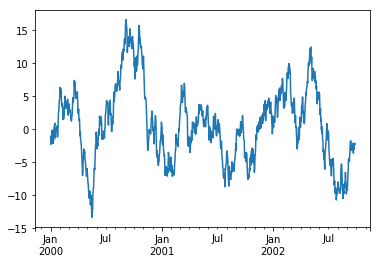

<Figure size 432x288 with 0 Axes>

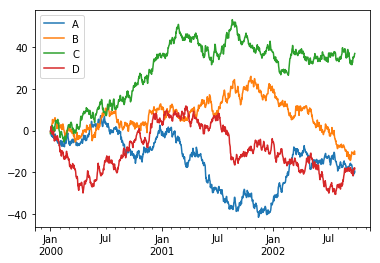

In [118]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## 12. Getting Data In / Out

- csv
    - df.to_csv('foo.csv')
    - pd.read_csv('foo.csv')
- excel
    - df.to_excel('foo.xlsx', sheet_name='Sheet1')
    - df.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

In [119]:
df.to_csv('foo.csv')
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.305516,-0.888634,-1.496848,-0.355656
1,2000-01-02,-0.552616,-0.765557,-0.473112,0.327425
2,2000-01-03,-1.661337,-1.141066,0.477106,1.435442
3,2000-01-04,-2.388155,-0.092501,0.871346,2.116677
4,2000-01-05,-2.669299,1.560488,0.595275,0.383918
5,2000-01-06,-2.127614,3.129850,2.419765,-1.074447
6,2000-01-07,-2.579872,3.459115,2.425934,-1.738540
7,2000-01-08,-3.097953,5.293958,1.100753,-1.117818
8,2000-01-09,-1.994777,3.645633,-0.357153,-1.032994
9,2000-01-10,-3.095904,3.574623,-0.740777,-2.030848
